In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob, os
import csv
import plotly.express as px

## Step 1: Load all the dataset into dataframe


The original files have each day as a seperate csv file and they were all put into one folder. In this section, I wrote a loop function to load all the files in the folder as python into dataframe, and then I concated all the dataframe into one big dataframe. 


In [3]:
path = r"/Users/lindachen/Downloads/COVID-19-master/daily_case_updates"
all_files = glob.glob(path + "/*.csv")

daily_data= []
for file in all_files:
    daily_data.append(pd.read_csv(file))

till_feb13df = pd.concat(daily_data, ignore_index=True)

<br>

## Step 2: Organize the dataframe
<br>

**There are three things that I did in this section:**

1. rename the columns so that they can be referred to more easily
2. for the "last_update" column, I got rid of the hours because in this analysis, I only want to see the changes of data by date
3. In my analysis, I am only concerend with the columns of confirmed cases, deaths cases and recovered cases and therefore, I drop the other irrelevant columns. 

In [4]:
#rename
tillfeb13_newdf = till_feb13df.rename(columns={"Province/State": "state", "Country/Region": "region", "Last Update": "last_update"})
#organize data column - change datatype from string to date
tillfeb13_newdf["last_update"] = pd.to_datetime(tillfeb13_newdf["last_update"], infer_datetime_format=True)
#organize data column - only keepign the date
tillfeb13_newdf['just_date'] = tillfeb13_newdf['last_update'].dt.date
#print(tillfeb13_newdf.head())

#drop irrelevant columns
tillfeb13_cleandf = tillfeb13_newdf.drop(columns =["Suspected", "ConfnSusp", "last_update", "Notes"], axis = 1)
print(tillfeb13_cleandf.head())

       state          region  Confirmed  Deaths  Recovered   just_date
0      Hubei  Mainland China    48206.0  1310.0     3459.0  2020-02-13
1  Guangdong  Mainland China     1241.0     2.0      314.0  2020-02-13
2      Henan  Mainland China     1169.0    10.0      296.0  2020-02-13
3   Zhejiang  Mainland China     1145.0     0.0      360.0  2020-02-13
4      Hunan  Mainland China      968.0     2.0      339.0  2020-02-13


<br></br>
## Step 3: Take a master view
<br>

I want to first give an overall review of the situation internationally, from its outbreak to Feb.13th. And thus, I present the data here in terms of the sum of all confirmed cases, all deaths, all recovered in different locations.

In [5]:
master_view = tillfeb13_cleandf.groupby("state").sum().reset_index()
master_view.sort_values(by=['Confirmed'], inplace=True, ascending=False)
master_viewnew = master_view.reset_index()
print(master_viewnew)

    index                         state  Confirmed   Deaths  Recovered
0      22                         Hubei   621784.0  18813.0    32215.0
1      14                     Guangdong    28268.0     14.0     2768.0
2      59                      Zhejiang    28145.0      0.0     3691.0
3      20                         Henan    24628.0    129.0     2633.0
4      23                         Hunan    21213.0     15.0     3114.0
5       0                         Anhui    18112.0     33.0     1340.0
6      27                       Jiangxi    17161.0      8.0     1646.0
7       9                     Chongqing    12516.0     54.0      958.0
8      26                       Jiangsu    11372.0      0.0     1244.0
9      45                      Shandong    10991.0     14.0      999.0
10     48                       Sichuan    10219.0     31.0     1141.0
11      3                       Beijing     8628.0     53.0      849.0
12     46                      Shanghai     7847.0     41.0      822.0
13    

 ### Insights:

#### From the graph below, there are two important insights that I concluded:

1. **Coronavirus ourbreak is still a regional outbreak in the Hubei Province of China**. It is not yet a country-wide outbreak, nor it is an international outbreak.

2. **Due to the huge differences in absoulte values in different areas, it will be more useful to look at rates**. Therefore, in the following analysis, I will focusing on comparing the growth rate in different regions. 

    Due to the uniqueness of Hubei province, I seperate Hubei province from the rest of China. And I group rest of the China together, regions outside of mainland China together for the convenience of analysis. 

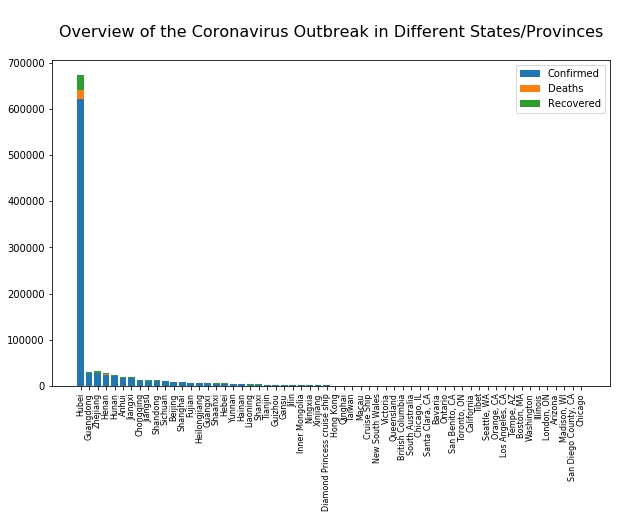

In [6]:
places = np.array(master_viewnew.state)
first= master_viewnew.Confirmed
second = master_viewnew.Deaths
third = master_viewnew.Recovered


plt.figure(figsize=(10,6))
ax=plt.subplot()

plt.bar(range(len(places)), first)
plt.bar(range(len(places)), second, bottom=first)
plt.bar(range(len(places)), third, bottom=(first+second))

ax.set_xticks(range(len(places)))
ax.set_xticklabels(places, rotation = 90, fontsize=8)

plt.title("\nOverview of the Coronavirus Outbreak in Different States/Provinces\n", fontsize=16)
plt.legend(["Confirmed",  "Deaths", "Recovered"])

plt.show()

<br>

## Step 4: Analysis of the Confirmed cases
<br>

In [7]:
#seperate the dataframe into three regions
Hubei_df = tillfeb13_cleandf.loc[tillfeb13_cleandf["state"]=="Hubei"]
restChina_df = tillfeb13_cleandf.loc[(tillfeb13_cleandf["region"]=="Mainland China") & (tillfeb13_cleandf["state"] != "Hubei")]
notChina_df = tillfeb13_cleandf.loc[tillfeb13_cleandf["region"] !="Mainland China"]

#organize all the dataframes in terms of day-by-day
Hubei_bydate = Hubei_df.groupby("just_date").sum().reset_index()
restChina_bydate = restChina_df.groupby("just_date").sum().reset_index()
notChina_bydate = notChina_df.groupby("just_date").sum().reset_index() 

print(Hubei_bydate)


     just_date  Confirmed  Deaths  Recovered
0   2020-01-21      270.0     6.0       25.0
1   2020-01-22      444.0    17.0       28.0
2   2020-01-23      444.0    17.0       28.0
3   2020-01-24     1098.0    48.0       62.0
4   2020-01-25     2542.0   131.0      106.0
5   2020-01-26     2481.0   128.0       86.0
6   2020-01-27     5560.0   252.0      137.0
7   2020-01-28     9822.0   350.0      212.0
8   2020-01-29    11694.0   412.0      258.0
9   2020-01-30    10709.0   366.0      206.0
10  2020-01-31     5806.0   204.0      141.0
11  2020-02-01    34557.0  1142.0      846.0
12  2020-02-02    22354.0   700.0      590.0
13  2020-02-03    11177.0   350.0      300.0
14  2020-02-04    57244.0  1721.0     1712.0
15  2020-02-05    16678.0   479.0      538.0
16  2020-02-06    41777.0  1167.0     1529.0
17  2020-02-07    22112.0   618.0      867.0
18  2020-02-08    24953.0   699.0     1218.0
19  2020-02-09    83831.0  2431.0     4715.0
20  2020-02-10    61359.0  1845.0     4076.0
21  2020-0

In [8]:
#write a function that returns the growth rate with any column in a given dataframe
def growth_rate (df, column):
    rate = []
    for x in range(len(df[column])):
        if x > 0:
            new = df[column][x]-df[column][x-1]
            growth_rate = new/(df[column][x-1]) * 100
            rate.append(growth_rate)
        else:
            rate.append(0)
    return rate

### Observation:

The table below is very intersting because for some days that are some huge drops in the "Confirmed" cases despite the low change in "Recovered" cases, for example, on Jan. 30th, on Feb 4th and on Feb. 12th. This might due to reporting errors. 

In [9]:
#create a new column in each dataframe that stores the growth rate of all the confirmed cases
Hubei_bydate["confirmed_growthrate"] = growth_rate(Hubei_bydate, "Confirmed")
restChina_bydate["confirmed_growthrate"] = growth_rate(restChina_bydate, "Confirmed")
notChina_bydate["confirmed_growthrate"] = growth_rate(notChina_bydate, "Confirmed")

print(Hubei_bydate)
print(restChina_bydate)
print(notChina_bydate)

     just_date  Confirmed  Deaths  Recovered  confirmed_growthrate
0   2020-01-21      270.0     6.0       25.0              0.000000
1   2020-01-22      444.0    17.0       28.0             64.444444
2   2020-01-23      444.0    17.0       28.0              0.000000
3   2020-01-24     1098.0    48.0       62.0            147.297297
4   2020-01-25     2542.0   131.0      106.0            131.511840
5   2020-01-26     2481.0   128.0       86.0             -2.399685
6   2020-01-27     5560.0   252.0      137.0            124.103184
7   2020-01-28     9822.0   350.0      212.0             76.654676
8   2020-01-29    11694.0   412.0      258.0             19.059255
9   2020-01-30    10709.0   366.0      206.0             -8.423123
10  2020-01-31     5806.0   204.0      141.0            -45.783920
11  2020-02-01    34557.0  1142.0      846.0            495.194626
12  2020-02-02    22354.0   700.0      590.0            -35.312672
13  2020-02-03    11177.0   350.0      300.0            -50.00

### Observation and Insights

1. The growth rates of confirmed cases are really volatile, like noted in the obversation, it is probably due to **errors in data reporting**. It will be intersting to do some data treatment, for example, replacing the data points that have abnormal drop to an educated guess. 

2. In the Hubei Province, the growth rates have been much higher than other areas. This alins with the anlysis that it is an regional outbreak. 
    
    However, the graph leaves an intersting question: **Is the growth rate exponential?** In other words, if Region X has more confirmed cases, will the virus spread faster in Region X than other regions that have less confirmed cases? 
    
    If we compare Hubei to other regions, the answer seems to be yes. However, if we compare "Rest of China" to "Internationally", the answer is not so obvious. While the "Rest of China" has a lot more confirmed cases in absolute numbers than regions outside of China, the growth rate is about the same. 
    
    To explain the ambiguousness of the answer, it is important to note that I arbitrary divided the regions as it is in this study without taking into accounts of important factors like geographical size or population density of the study region.   

3. **The graph seems to indicate a pattern of start-peak-down**, with the first peak around Jan.23/24th, the second peak around Feb 1st/2nd, the third peak around Feb 9th/10th. Thus, in my later analysis, I want to divide the timeline into three periods and study the distribution of the growth rates in each period to see the change in the scale of outbreaks. 

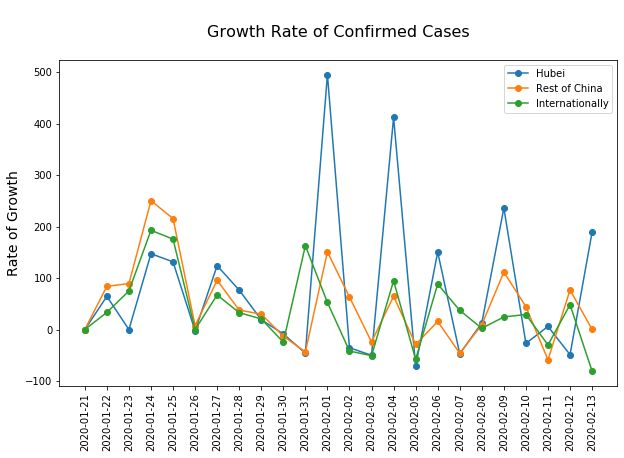

In [10]:
plt.figure(figsize=(10,6))
ax = plt.subplot()

plt.plot(range(len(Hubei_bydate.just_date)), Hubei_bydate.confirmed_growthrate, label="Hubei", marker="o")
plt.plot(range(len(Hubei_bydate.just_date)), restChina_bydate.confirmed_growthrate, label="Rest of China", marker="o")
plt.plot(range(len(Hubei_bydate.just_date)), notChina_bydate.confirmed_growthrate, label="Internationally", marker="o")

ax.set_ticks = Hubei_bydate.just_date
ax.set_xticks(range(len(Hubei_bydate.just_date)))
ax.set_xticklabels(Hubei_bydate.just_date, rotation=90)

plt.legend()
plt.title("\nGrowth Rate of Confirmed Cases\n", fontsize =16)
plt.ylabel("Rate of Growth", fontsize = 14)
plt.show()


<br></br>
## Step 5: Analysis of Death and Recovered Cases
<br>

In this section, instead of studying the growth rate of Death cases and the growth rate of recovered cases, **I studied the change of mortality rate and recovered rate**. The reason is that if there is indeed reporting errors, it is very likely that we will see volatile lines with no clear patterns again. It will be more useful to study the overall mortality rate, recovered rate and their changes overtime. 

### Observation and Insights

1. The mortality rate in Hubei province was much higher than other regions but it has slowed down and stayed stable; at the end, it even started to show a sign of decline. This might be due to the fact that during the early days of the outbreak, the large numbers of outbreak cases in Hubei province caused lots of local hospitals to run out of protection equipments like masks and gloves. Also the local hospitals might be overwhelmed by the numbers of increased cases in such a short period of time. Thus, patients could not be effectively treated. 
    
    In the later peirod, the Chinese government enforced a strict control of the distribution of medical equipments, namely all the supplies must put Hubei Province first.  And all the experts dedicated their efforts to help with the situation. Thus, the situation started to stablized. 
    
2. The mortality rate in rest of the China has remained low and stable while the interntional mortality has not been very positive. This might be due to the fact that international regions did not put effectively measurement into treating cases like China did, or it could simply due to fact that the absolute numbers of other regions are much lower than in China and thus, they are not statistically significant. 

**In conclusion, the mortality rate thus far shows that the Coronavirus is not vital like SARS and the death rate can be effectivly controlled.**


In [11]:
death_rate = lambda row: (row.Deaths)/(row.Confirmed) *100 

Hubei_bydate["death_rate"] = Hubei_bydate.apply(death_rate, axis=1)
restChina_bydate["death_rate"] = restChina_bydate.apply(death_rate, axis=1)
notChina_bydate["death_rate"] = notChina_bydate.apply(death_rate, axis=1)

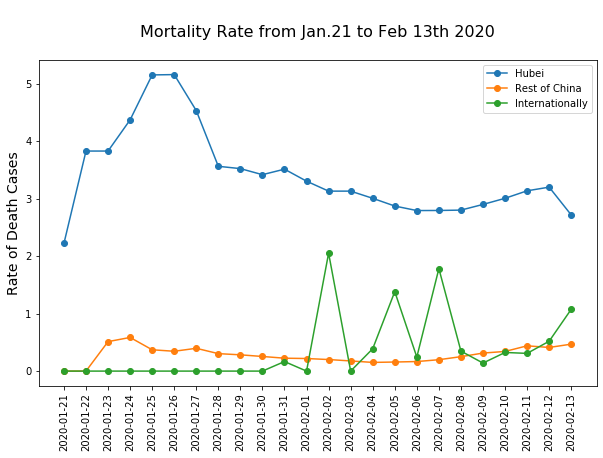

In [12]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
plt.plot(range(len(Hubei_bydate.just_date)), Hubei_bydate.death_rate, label="Hubei", marker="o")
plt.plot(range(len(Hubei_bydate.just_date)), restChina_bydate.death_rate, label="Rest of China", marker="o")
plt.plot(range(len(Hubei_bydate.just_date)), notChina_bydate.death_rate, label="Internationally", marker="o")

#ax.set_ticks = Hubei_bydate.just_date
ax.set_xticks(range(len(Hubei_bydate.just_date)))
ax.set_xticklabels(Hubei_bydate.just_date, rotation=90)
plt.legend()
plt.ylabel("Rate of Death Cases", fontsize =14)
plt.title("\nMortality Rate from Jan.21 to Feb 13th 2020\n", fontsize = 16)
plt.show()

### Observation and Insights

Overall, there is a trend of increase in the recovered rate. However, in internatonal regions, the rate has been very unstable in the Hubei province, the recovered rate though stabe, is lower than other regions. 

Based on the news report I have read, no region has an effective formula for treatment. The best thing the hospital can do is effectivly isolate the patient and make sure no enviornmental factors will cause the patients to get wrose. The rest depends on the patients' own immune system. 

Thus, it is hard to draw any insights without a further look into the demographic of infected people. Nonetheless, the gengeral conclusion is that Coronavirus is not vital. 

In [13]:
recover_rate = lambda row: (row.Recovered)/(row.Confirmed) *100 

Hubei_bydate["recover_rate"] = Hubei_bydate.apply(recover_rate, axis=1)
restChina_bydate["recover_rate"] = restChina_bydate.apply(recover_rate, axis=1)
notChina_bydate["recover_rate"] = notChina_bydate.apply(recover_rate, axis=1)

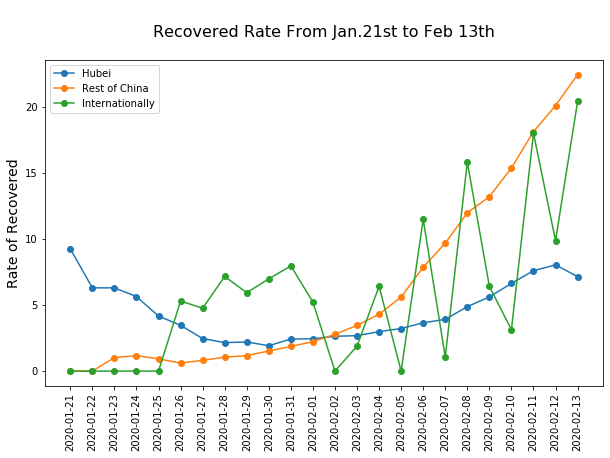

In [14]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
plt.plot(range(len(Hubei_bydate.just_date)), Hubei_bydate.recover_rate, label="Hubei", marker="o")
plt.plot(range(len(Hubei_bydate.just_date)), restChina_bydate.recover_rate, label="Rest of China", marker="o")
plt.plot(range(len(Hubei_bydate.just_date)), notChina_bydate.recover_rate, label="Internationally", marker="o")

#ax.set_ticks = Hubei_bydate.just_date
ax.set_xticks(range(len(Hubei_bydate.just_date)))
ax.set_xticklabels(Hubei_bydate.just_date, rotation=90)
plt.legend()
plt.ylabel("Rate of Recovered", fontsize =14)
plt.title("\nRecovered Rate From Jan.21st to Feb 13th\n", fontsize=16)
plt.show()

<br></br>
## Step 6: Statistical Analysis of the growth rate of the Confirmed cases
<br>

As I mentioned in step 4, I want to divide the timeline into three periods and study the distribution of the growth rates in each period to see the change in the scale of outbreaks. In other words, **though there seems to be a pattern of: start-peak-slow, I woner is the peak getting lower each time**, which means the outbreak of the virus has been effectivly controlled? 


In [15]:
from scipy.stats import iqr

In [16]:
#Becuase the growthrate of index 0 is 0, I start the analysis with index 1

hubei_cases = np.array([Hubei_bydate.confirmed_growthrate[1:]])
restChina_cases = np.array([restChina_bydate.confirmed_growthrate[1:]])
notChina_cases = np.array([notChina_bydate.confirmed_growthrate[1:]])

In [17]:
#some basic statistical analysis of the growth rate before looking at the distribution of growth rate

hubei_mean = np.mean(hubei_cases)
restChina_mean = np.mean(restChina_cases)
notChina_mean = np.mean(notChina_cases)

#std, IQR
hubei_std = np.std(hubei_cases)
restChina_std = np.std(restChina_cases)
notChina_std = np.std(notChina_cases)

hubei_iqr = iqr(hubei_cases)
restChina_iqr = iqr(restChina_cases)
notChina_iqr = iqr(notChina_cases)

### Observation and Insights:

The mean of Hubei province is a lot higher than the other two regions as expected. All three regiions' growt rate are volatile since its standard deviation is large. I also put in interquartile to see the spread of deviation since interquartile does not get impacted by outliars. The interquartile also indicated the spread is big. Therefore, it gives more reasons divide the analysis into different periods. 

In [18]:
print(hubei_mean, restChina_mean, notChina_mean)
print(hubei_iqr, restChina_iqr, notChina_iqr)
print(hubei_std, restChina_std, notChina_std)

75.18937854754112 49.26579335806146 37.07668646428257
170.4640607619937 92.94828977602447 83.339539706183
144.51253775633018 78.18191456387466 71.04516656692313


### Three periods: 
- **First Period: until Jan. 31st**
- **Secon Period: until Feb 7th**
- **Last Period: Feb 8th till Feb 13th**

### Observation and Insights:

Though one can argue that due to the low occurance of events, there is no statistical significance in the following analysis, it is still might be intersting to look at the pattern, or to see if there is a pattern. 

My observation is:
- In the first period, it is a little all over the places but **growth rates centered around  0-100%.** 
- In the second period, **the data got extreme**, many times we have negative growth rate and we also had 2 extremely large growth rate. 
- In the third period, it is clear that extreme numbers are **less extreme** than in the second period and **growth rates centered aroun 0-60%**. 

In conclusion, I see a positive sign. 

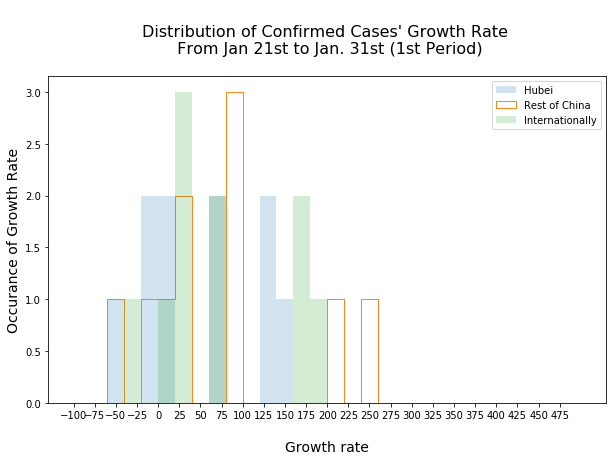

In [19]:
plt.figure(figsize=(10, 6))

ax = plt.subplot()
plt.hist(Hubei_bydate.confirmed_growthrate[1:11], range=(-100, 500), bins=30, alpha=0.2, label = "Hubei")
plt.hist(restChina_bydate.confirmed_growthrate[1:11], range=(-100, 500), bins=30, alpha=15, histtype='step',label="Rest of China")
plt.hist(notChina_bydate.confirmed_growthrate[1:11], range=(-100, 500), bins=30, alpha=0.2, label="Internationally")

ax.set_xticks(range(-100, 500, 25))

plt.ylabel("Occurance of Growth Rate", fontsize = 14)
plt.xlabel("\nGrowth rate", fontsize = 14)
plt.title("\nDistribution of Confirmed Cases' Growth Rate \n From Jan 21st to Jan. 31st (1st Period)\n", fontsize=16)
plt.legend()
plt.show()

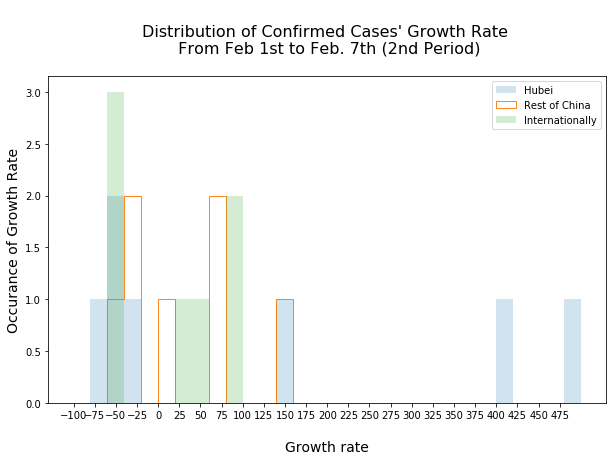

In [20]:
plt.figure(figsize=(10, 6))

ax = plt.subplot()

plt.hist(Hubei_bydate.confirmed_growthrate[11:18], range=(-100, 500),bins=30, alpha=0.2, label="Hubei")
plt.hist(restChina_bydate.confirmed_growthrate[11:18], range=(-100, 500), bins =30, alpha=15, histtype='step', label="Rest of China")
plt.hist(notChina_bydate.confirmed_growthrate[11:18], range=(-100, 500), bins=30, alpha=0.2, label="Internationally")

ax.set_xticks(range(-100, 500, 25))

plt.ylabel("Occurance of Growth Rate", fontsize = 14)
plt.xlabel("\nGrowth rate", fontsize = 14)
plt.title("\nDistribution of Confirmed Cases' Growth Rate \n From Feb 1st to Feb. 7th (2nd Period)\n", fontsize=16)
plt.legend()

plt.show()

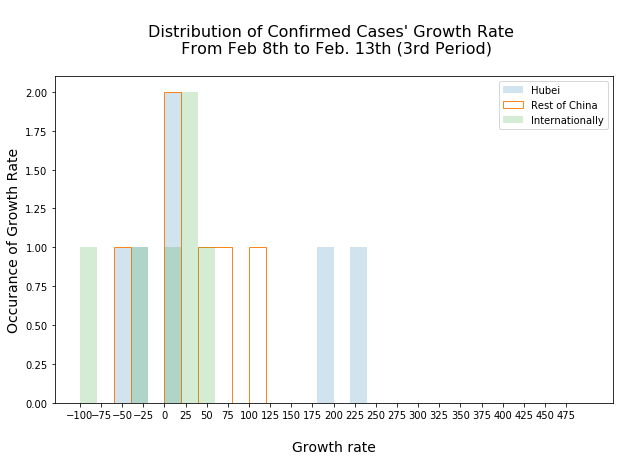

In [21]:
plt.figure(figsize=(10, 6))

ax = plt.subplot()

plt.hist(Hubei_bydate.confirmed_growthrate[18:], range=(-100,500), bins=30, alpha=0.2, label="Hubei")
plt.hist(restChina_bydate.confirmed_growthrate[18:], range=(-100,500), bins=30, alpha=15, histtype='step', label="Rest of China")
plt.hist(notChina_bydate.confirmed_growthrate[18:], range=(-100,500), bins =30, alpha=0.2, label="Internationally")

ax.set_xticks(range(-100, 500, 25))

plt.ylabel("Occurance of Growth Rate", fontsize = 14)
plt.xlabel("\nGrowth rate", fontsize = 14)
plt.title("\nDistribution of Confirmed Cases' Growth Rate \n From Feb 8th to Feb. 13th (3rd Period)\n", fontsize=16)
plt.legend()

plt.show()

## Final Remark: STAY CLAM and continue to torture data. 

## Future Studies:

1. Verify the accuracy of current dataset

2. It will be intersting and important to build a perdictive model based on the dataset. This is also the goal for myself in the next step. I am still new to programming and haven't learned perictive modelling yet. 

3. If we can have demographic data of infected patients, recovered patients and died patients, there is a potential to do K means cluster analysis. 

    Lots of news report has stated that old people, people who have weaker immune systems are more likely to get infected and are more likely to have a vital impact by the virus. This cluster analysis can also be used to compare with flu's cluster analysis since flu also caused death every year, to see how they differ. This might give the public a better indication of what they can do and if they should panic over this virus. 

All comments are welcomed. Thanks!